In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# Traitement d'images

In [27]:
from PIL import Image
import os
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

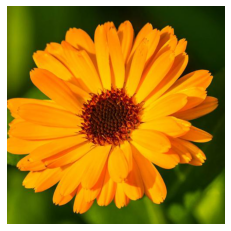

In [37]:
im =Image.open("fleur.jpeg") #mettre le nom de l'image
l,h=im.size

dat=np.array(im.getdata()).reshape((l,h,3))

plt.imshow(im)
plt.box(False)
plt.axis(False)
plt.show()

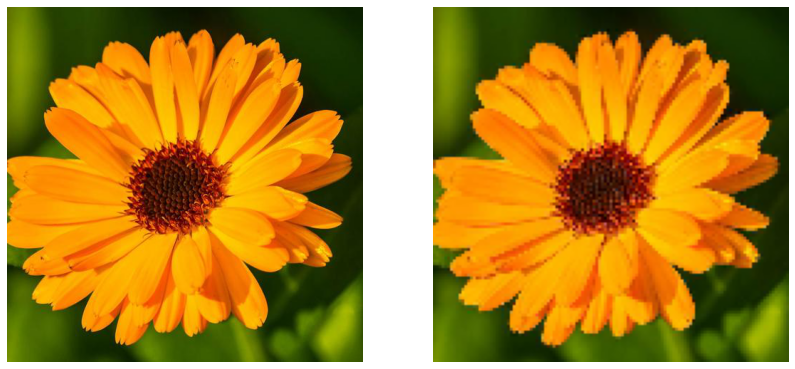

In [43]:
# Plus petite
dat2=dat[::4,::4,:]
im2=Image.new("RGB",(l//4,h//4))

for i in range(l//4):
    for j in range(h//4):
        im2.putpixel((i,j),tuple(dat2[j,i]))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

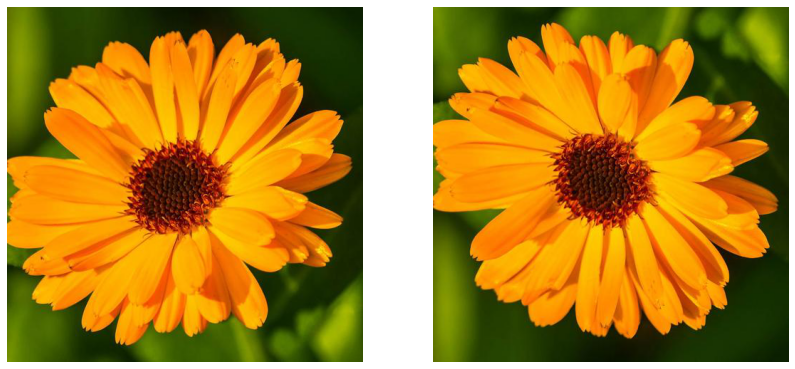

In [45]:
# Inversion haut-bas

dat2=dat[::-1,:,:]
im2=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        im2.putpixel((i,j),tuple(dat2[j,i]))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

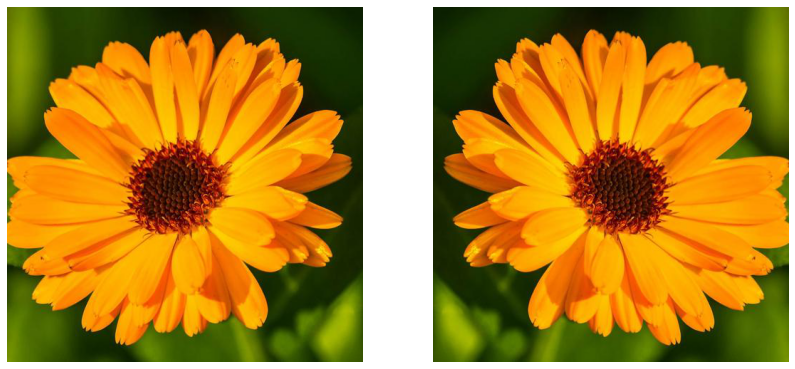

In [46]:
# Idem pour droite gauche
dat2=dat[:,::-1,:]
im2=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        im2.putpixel((i,j),tuple(dat2[j,i]))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

1.1405322551727295


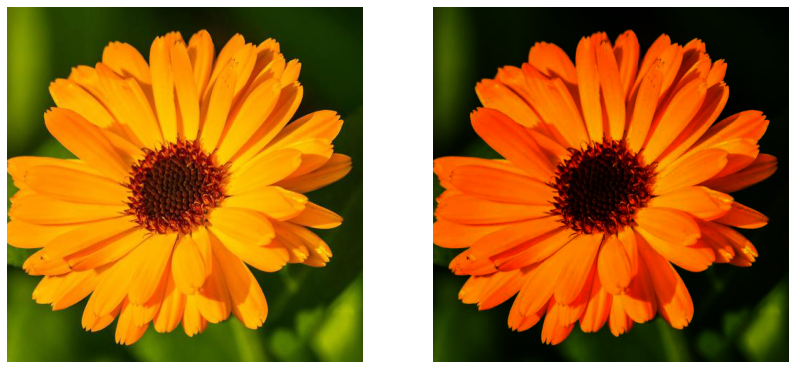

In [52]:
# Modification des teintes
# Plus foncé

t=time.time()



im2=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        im2.putpixel((i,j),(int(255*(dat[j,i,0]/255)**2),
                            int(255*(dat[j,i,1]/255)**2),
                            int(255*(dat[j,i,2]/255)**2)))
        
print(time.time()-t)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

0.031725168228149414


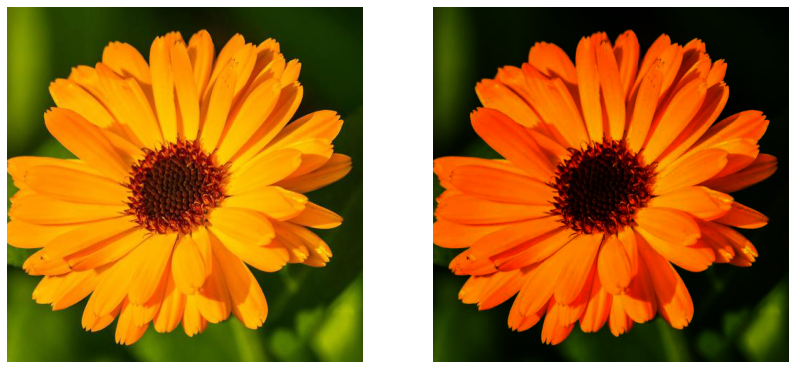

In [54]:
#x^2 plus rapide (environ 50x)
t = time.time()
dat3=np.asarray(Image.open("fleur.jpeg"))

dat2=255*(dat3[:]/255)**2

im2=Image.fromarray(np.uint8(dat2))#cree une nouvelle image et toutes lavaleurs sont converties en int
print(time.time()-t)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

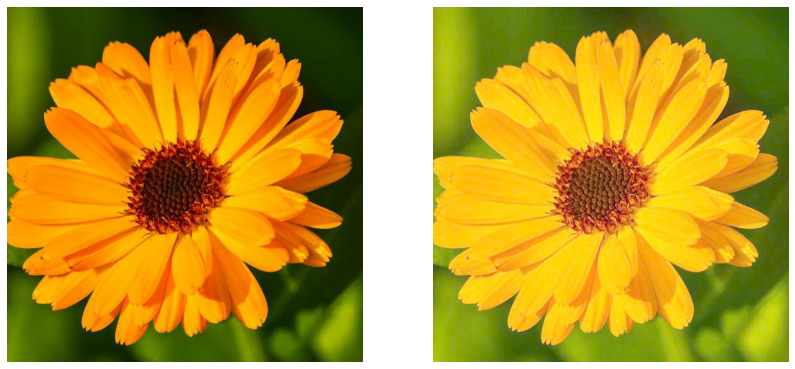

In [55]:
# éclaircir avec x^0.5

dat2 = 255*(dat[:,:,:]/255)**0.5
im2=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        im2.putpixel((i,j),tuple(map(int,dat2[j,i])))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

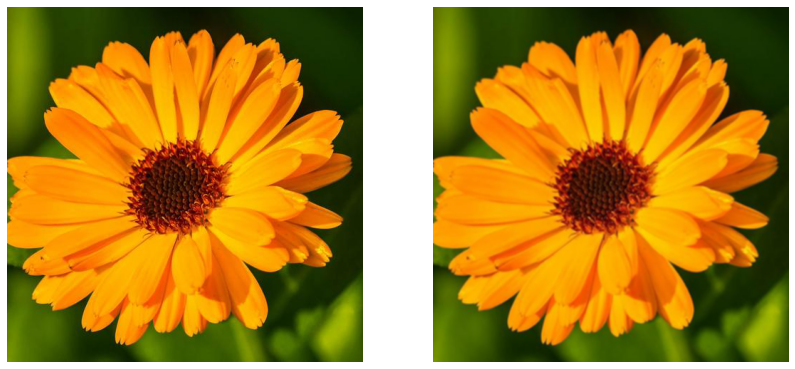

In [56]:
# flouter avec la moyenne
dat2=dat[:,:,:]
dat2[1:-1,1:-1,:]=(dat[0:-2,1:-1,:]+dat[1:-1,1:-1,:]+dat[2:,1:-1,:]+dat[0:-2,0:-2,:]+dat[1:-1,0:-2,:]+dat[2:,0:-2,:]+dat[0:-2,2:,:]+dat[1:-1,2:,:]+dat[2:,2:,:])//9

im2=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        im2.putpixel((i,j),tuple(map(int,dat2[j,i])))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

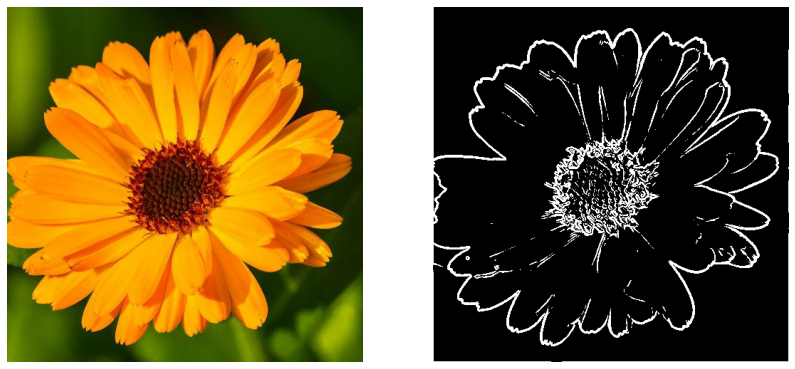

In [57]:
# Détection de contours
seuil=32
dat2=(dat[:,:,0]+dat[:,:,1]+dat[:,:,2])//3
dat2[1:-1,1:-1]=((dat2[0:-2,1:-1]-dat2[2:,1:-1])**2+(dat2[1:-1,0:-2]-dat2[1:-1,2:])**2)**0.5
maxi=np.max(dat2)
dat2=255*dat2/maxi
im2=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        if int(dat2[j,i])>seuil:
            im2.putpixel((i,j),(255,255,255))
        else:
            im2.putpixel((i,j),(0,0,0))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

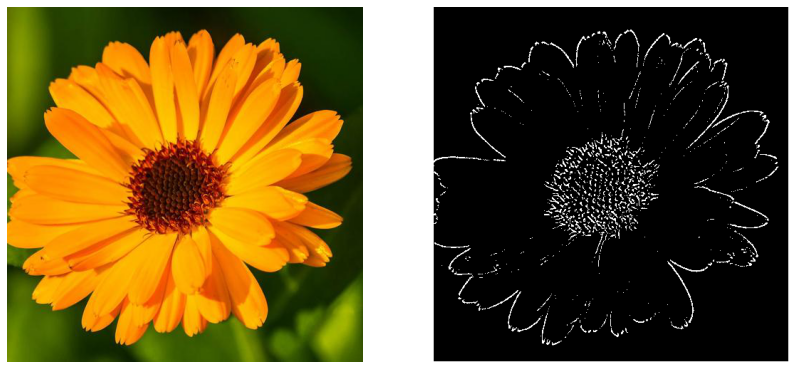

In [59]:
# idem avec le laplacien (filtre laplacien)
seuil=16
dat2=(dat[:,:,0]+dat[:,:,1]+dat[:,:,2])//3
dat2[1:-1,1:-1]=4*dat2[1:-1,1:-1]-dat2[0:-2,1:-1]-dat2[2:,1:-1]-dat2[1:-1,0:-2]-dat2[1:-1,2:]
maxi=np.max(dat2)
dat2=255*dat2/maxi
im2=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        if int(dat2[j,i])>seuil:
            im2.putpixel((i,j),(255,255,255))
        else:
            im2.putpixel((i,j),(0,0,0))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

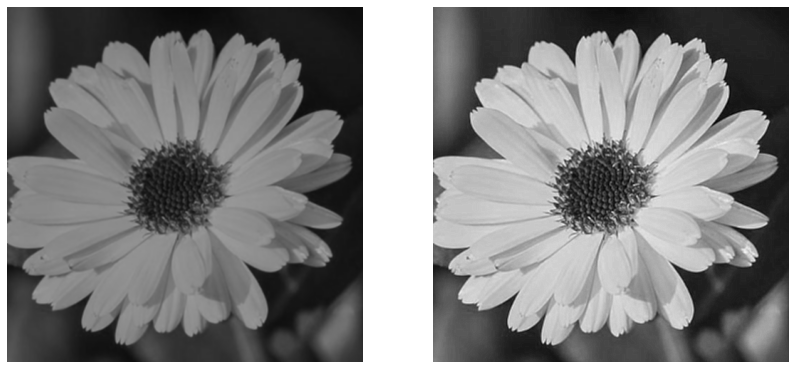

In [61]:
# masque flou (filtre sharpen)

# On passe en niveaux de gris
dat1=(dat[:,:,0]+dat[:,:,1]+dat[:,:,2])//3
dat2=dat1.copy()
for i in range(15):
    dat2[1:-1,1:-1] = (dat1[0:-2,1:-1]+dat1[1:-1,1:-1]+dat1[2:,1:-1]+dat1[0:-2,0:-2]+dat1[1:-1,0:-2]+dat1[2:,0:-2]+dat1[0:-2,2:]+dat1[1:-1,2:]+dat1[2:,2:])//9
dat3=dat1-dat2

dat4=dat1+2.0*dat3 #image de depart + un peu de détails
maxi=np.max(dat4)
dat4=dat4*255/maxi #normaliser à 255
im2=Image.new("RGB",(l,h))
im3=Image.new("RGB",(l,h))
for i in range(l):
    for j in range(h):
        im2.putpixel((i,j),tuple([int(dat4[j,i]) for k in range(3)]))
        im3.putpixel((i,j),tuple([int(dat1[j,i]) for k in range(3)]))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im3)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im2)
plt.axis("off")
plt.show()

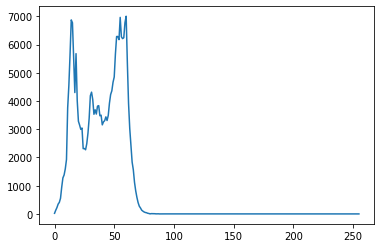

In [64]:
# histogramme

dat3=(dat[:,:,2]+dat[:,:,1]+dat[:,:,2])//3
dat3=dat3.reshape(l*h)
values=np.arange(256)
number=np.zeros(256)
for j in dat3:
    number[j]+=1
plt.plot(values,number)
plt.show()

166


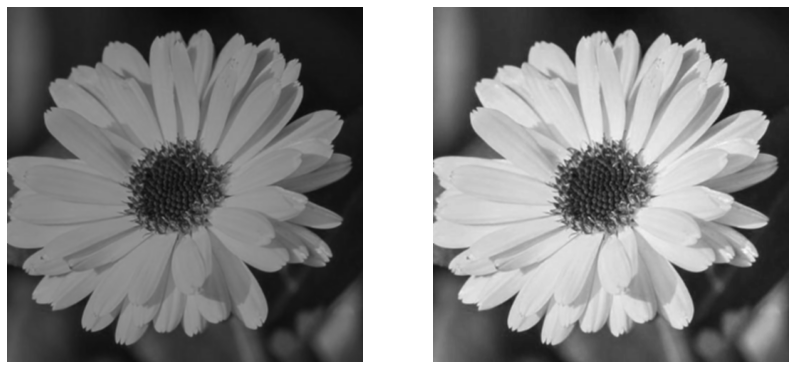

In [71]:
# recalage histogramme
dat3=(dat[:,:,0]+dat[:,:,1]+dat[:,:,2])//3
maxi=np.max(dat3)
print(maxi)
dat2=dat3.copy()
dat2=255*dat3/maxi

im4=Image.new("RGB",(l,h))
im5=Image.new("RGB",(l,h))

for i in range(l):
    for j in range(h):
        im4.putpixel((i,j),(int(dat2[j,i]),)*3)
        im5.putpixel((i,j),(dat3[j,i],)*3)

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(im5)
plt.axis("Off")
plt.subplot(1,2,2)
plt.imshow(im4)
plt.axis("off")
plt.show()

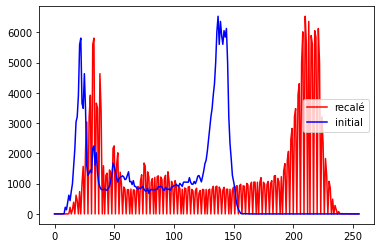

In [83]:
# nouvel histogramme
values=np.arange(256)
number=np.zeros(256)
numberi=np.zeros(256)
for j in dat2:
    for val in j:
        number[int(val)] += 1
for j in dat3:
    for val in j:
        numberi[int(val)]+=1
        
plt.plot(values,number,"r",label="recalé")
plt.plot(values,numberi,"b",label="initial")
plt.legend()
plt.show()